In [122]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [123]:
df_India = df[df['job_country'] == 'India'].dropna(subset=['salary_year_avg'])
df_India

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1209,Machine Learning Engineer,Computer Vision Developer (R&D),"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-02-18 13:12:30,False,False,India,year,79200.0,NaN,Bosch Group,"[python, opencv, tensorflow, pytorch, keras, m...","{'libraries': ['opencv', 'tensorflow', 'pytorc..."
2022,Data Engineer,Data Engineer - SQL (Power BI),India,via Ai-Jobs.net,Full-time,False,India,2023-10-31 13:09:54,False,False,India,year,156500.0,NaN,Gartner,"[java, t-sql, sql, azure, power bi, dax, notion]","{'analyst_tools': ['power bi', 'dax'], 'async'..."
2785,Data Engineer,Staff Software Engineer - Data Engineering (Ja...,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-05-26 13:13:28,False,False,India,year,147500.0,NaN,Zscaler,"[java, nosql, neo4j, redshift, aws, spring, sp...","{'analyst_tools': ['excel'], 'cloud': ['redshi..."
3190,Senior Data Engineer,Senior Big Data DevOps & Deployment Engineer,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-07-07 13:14:21,False,False,India,year,79200.0,NaN,ServiceNow,"[sql, perl, bash, groovy, python, shell, redis...","{'analyst_tools': ['tableau'], 'cloud': ['azur..."
3930,Data Scientist,Lead Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-12-12 13:27:33,False,False,India,year,114516.0,NaN,Boeing,"[python, r, c++, tensorflow, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783733,Senior Data Scientist,Senior Data Scientist,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-06-27 06:12:11,False,False,India,year,157500.0,NaN,Publicis Groupe,"[aws, spark, tableau, cognos, excel, powerpoin...","{'analyst_tools': ['tableau', 'cognos', 'excel..."
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,"[power bi, tableau]","{'analyst_tools': ['power bi', 'tableau']}"
784768,Data Scientist,SR. DATA SCIENTIST,"Bengaluru, Karnataka, India",via Ai-Jobs.net,Full-time,False,India,2023-01-03 06:25:25,False,False,India,year,157500.0,NaN,Optiv,"[r, python, sql, databricks, power bi]","{'analyst_tools': ['power bi'], 'cloud': ['dat..."
785395,Data Engineer,Senior Consultant - Tech Consulting -Azure Dat...,India,via Ai-Jobs.net,Full-time,False,India,2023-12-19 06:10:41,False,False,India,year,64800.0,NaN,EY,"[sql, python, azure, databricks, spark, power ...","{'analyst_tools': ['power bi', 'tableau', 'qli..."


In [124]:
job_titles = df_India['job_title_short'].value_counts().index[:6].to_list()
df_India_top6 = df_India[df_India['job_title_short'].isin(job_titles)]

# order the job_titles by median salary
job_order = df_India_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles



['Data Engineer',
 'Data Analyst',
 'Data Scientist',
 'Machine Learning Engineer',
 'Senior Data Engineer',
 'Software Engineer']

Plot Salary Distributions

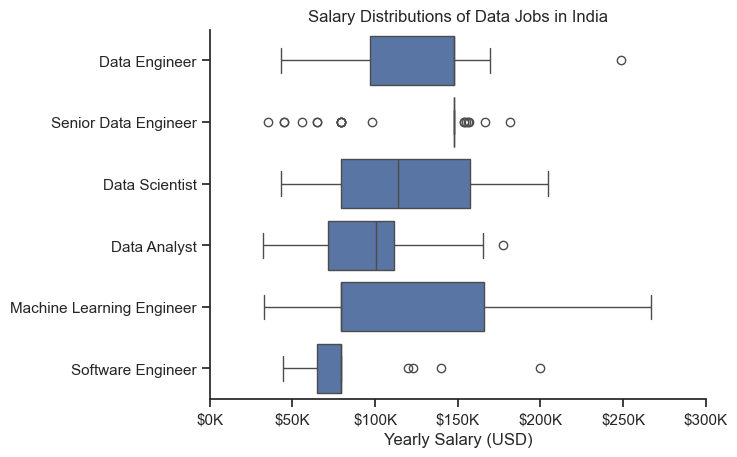

In [125]:
#plotting the top 6 job titles salary distribution in a box plot
sns.boxplot(data=df_India_top6,
            x='salary_year_avg',
            y='job_title_short',
            order=job_order)
sns.set_theme(style='ticks')
sns.despine()

plt.title('Salary Distributions of Data Jobs in India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 300000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

Investigate Median Salary Vs Skill for Machine Learning Engineers

In [126]:
# only get the ML in India
df_ML_India = df[(df['job_title_short'] == 'Machine Learning Engineer') & (df['job_country']== 'India')].copy()

# drop NaN values from the 'salary_year_avg'
df_ML_India =df_ML_India.dropna(subset=['salary_year_avg'])
df_ML_India = df_ML_India.explode('job_skills')
df_ML_India[['salary_year_avg', 'job_skills']].head()


,salary_year_avg,job_skills
1209,79200.0,python
1209,79200.0,opencv
1209,79200.0,tensorflow
1209,79200.0,pytorch
1209,79200.0,keras


Determine the Highest Paid Skills and Most demanded Skills

In [127]:
df_ML_top_pay = df_ML_India.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_ML_top_pay = df_ML_top_pay.head(10)
df_ML_top_pay

,count,median
job_skills,,
airflow,7,166000.0
scala,3,166000.0
dynamodb,1,166000.0
mongodb,2,166000.0
golang,1,166000.0
redis,2,166000.0
ansible,1,166000.0
c++,7,166000.0
shell,1,166000.0


In [128]:
df_ML_skills = df_ML_India.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_ML_skills = df_ML_skills.head(10).sort_values(by='median', ascending=False)
df_ML_skills

,count,median
job_skills,,
spark,11,166000.0
docker,14,157826.5
java,12,133514.5
aws,17,104668.0
pytorch,25,101029.0
scikit-learn,11,101029.0
tensorflow,22,97314.5
keras,14,97314.5
python,37,93600.0


compare it by the barchart

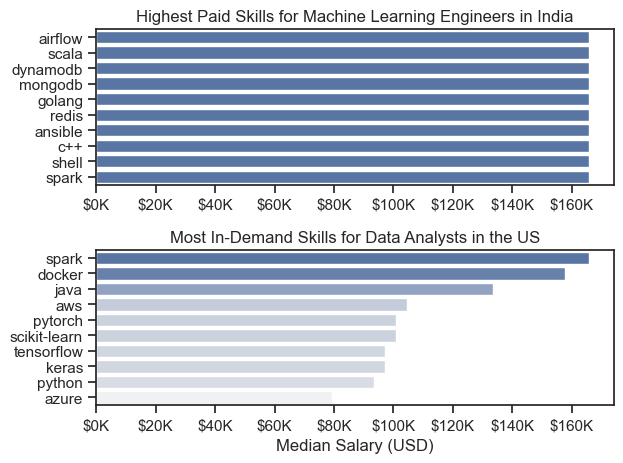

In [129]:
fig, ax = plt.subplots(2,1)

# first highest paid skills
sns.barplot(data=df_ML_top_pay,
            x= 'median',
            y= df_ML_top_pay.index,
            hue='median',
            ax=ax[0],
            palette='dark:b_r',
            )
ax[0].legend().remove()
ax[0].set_title('Highest Paid Skills for Machine Learning Engineers in India')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_ML_skills, x='median',
            y=df_ML_skills.index, 
            hue='median', ax=ax[1], 
            palette='light:b')
ax[1].legend().remove()


ax[1].set_title('Most In-Demand Skills for Data Analysts in the US')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()

Now for Australia

In [130]:
# First finding the top 6 jobs and making the boxplot then highest paid as well as most demand skills for ML


In [131]:
df_Aus = df[df['job_country']=='Australia'].dropna(subset=['salary_year_avg']).copy()



In [132]:
# top 6 jobs on the basis on salary year avg
job_title_Aus = df_Aus['job_title_short'].value_counts().index[:6].tolist() # it makes the list of the top 6 jobs 
df_Aus_top6 = df_Aus[df_Aus['job_title_short'].isin(job_title_Aus)] # give the whole data of the top 6 jobs
job_order_Aus = df_Aus_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index
job_order_Aus

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Software Engineer', 'Data Engineer', 'Machine Learning Engineer'],
      dtype='object', name='job_title_short')

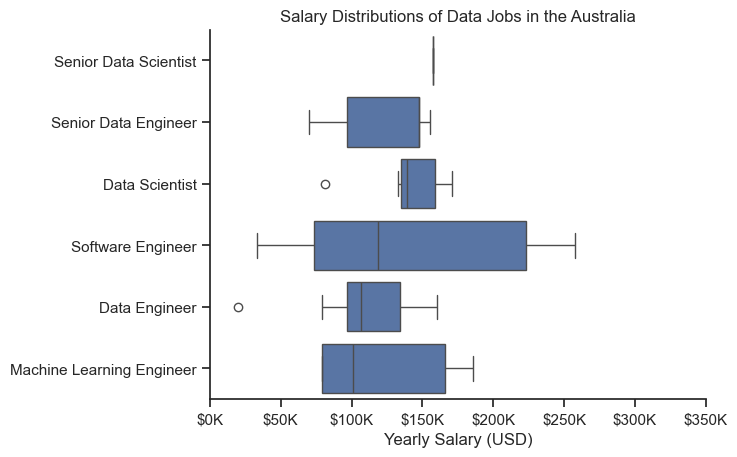

In [133]:
# plotting the boxplot
sns.boxplot(
    data=df_Aus_top6,
    x= 'salary_year_avg',
    y= 'job_title_short',
    order= job_order_Aus
)
sns.set_theme(style='ticks')
sns.despine()
plt.title('Salary Distributions of Data Jobs in the Australia')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 350000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()



Investigate Median Salary Salary Vs Skill for ML

In [134]:
df_ML_Aus = df[(df['job_title_short']== 'Machine Learning Engineer') & (df['job_country']== 'Australia')].copy()
df_ML_Aus = df_ML_Aus.dropna(subset=['salary_year_avg'])

df_ML_Aus = df_ML_Aus.explode('job_skills')
df_ML_Aus[['salary_year_avg', 'job_skills']].head()

,salary_year_avg,job_skills
56804,166000.0,java
56804,166000.0,javascript
56804,166000.0,python
56804,166000.0,kotlin
56804,166000.0,ruby


In [135]:
# determine the highest paid sills and most demanded skills
df_ML_Aus_top_pay = df_ML_Aus.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)
df_ML_Aus_top_pay = df_ML_Aus_top_pay.head(10)
df_ML_Aus_top_pay

,count,median
job_skills,,
linux,1,185500.0
shell,1,185500.0
pytorch,1,185500.0
opencv,1,185500.0
kotlin,1,166000.0
swift,1,166000.0
ruby,2,166000.0
redis,1,166000.0
mysql,1,166000.0


In [136]:
# determine the highest paid sills and most demanded skills
df_ML_Aus_skills = df_ML_Aus.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_ML_Aus_skills = df_ML_Aus_skills.head(10).sort_values(by='median', ascending=False)
df_ML_Aus_skills

,count,median
job_skills,,
pytorch,1,185500.0
ruby,2,166000.0
python,6,133514.5
docker,2,133514.5
kafka,2,133514.5
numpy,2,132350.0
tensorflow,2,132350.0
go,2,122600.0
java,3,79200.0


/var/folders/cj/05s72p5j54b7td3xc41my3zh0000gn/T/ipykernel_69765/590230901.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/cj/05s72p5j54b7td3xc41my3zh0000gn/T/ipykernel_69765/590230901.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend().remove()


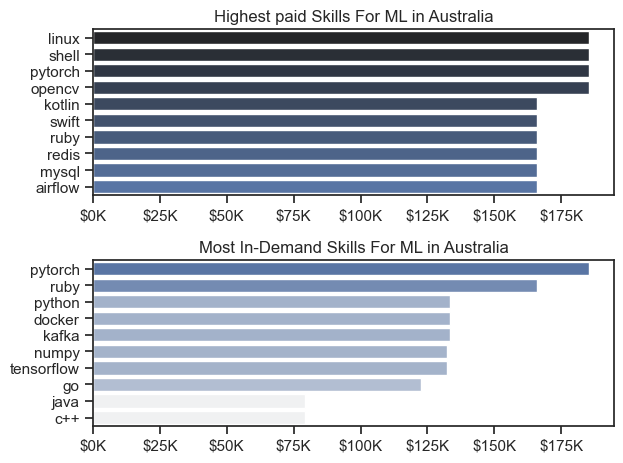

In [148]:
#plotting graph



fig, ax = plt.subplots(2, 1)
# highest paid skills
sns.barplot(
    data= df_ML_Aus_top_pay,
    x='median',
    y= df_ML_Aus_top_pay.index,

    ax=ax[0],
    palette= 'dark:b'
)
ax[0].legend().remove()
ax[0].set_title('Highest paid Skills For ML in Australia')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# highest paid with most demand skills
sns.barplot(
    data= df_ML_Aus_skills,
    x='median',
    y= df_ML_Aus_skills.index,
    hue= 'median',
    ax=ax[1],
    palette= 'light:b'

)
ax[1].legend().remove()
ax[1].set_title('Most In-Demand Skills For ML in Australia')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim())

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()
